# The Hybrid Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
rng = np.random.default_rng()

In [3]:
def hybrid(w, K, nTrials, debug=False):
    # w = Weights
    # nTrials = Number of Trials
    # K = arms
    # Create the mean reward values for each arm
    m = rng.normal(0, 0.5, size=(K))
    # initialise the estimated mean of each arm to 0
    mhat = np.zeros(K)
    # initialise estimated variance of each arm to 1
    shat = 0.5*np.ones(K)
    # Observation noise variance
    v = 0.1
    # Create regret array
    regret = np.zeros(nTrials)

    for trial in range(nTrials):
        # sample from the scaled posterior
        d = rng.normal(mhat, w[1]*shat)
        # Add UCB bonus
        ucb_bonus= w[0]*np.sqrt(shat)
        action = np.argmax(d+ucb_bonus)

        # Observe reward
        reward = rng.normal(m[action], v)
        # Calculate Regret
        regret[trial] = np.max(m) - m[action]
        # Calculate Kalman Gain
        g = shat[action] / (shat[action] + v)
        # Update Mean Estimate
        mhat[action] = mhat[action] + g*(reward - mhat[action])
        # Update Variance Estimate
        shat[action] = shat[action] - g*shat[action]

    average_regret = np.cumsum(regret)/ np.arange(1,nTrials+1)
    return average_regret

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
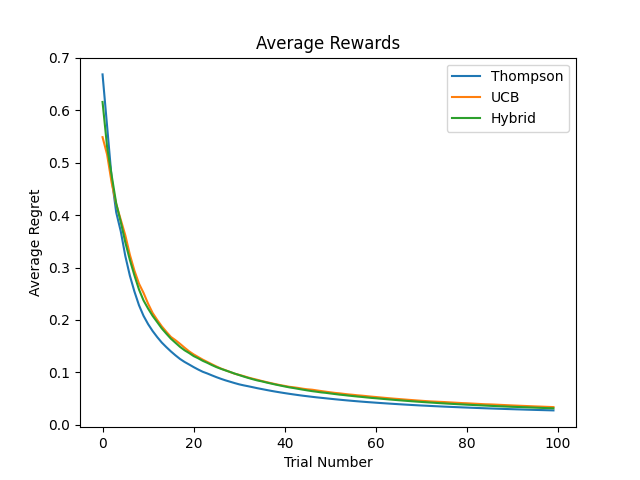

In [5]:
# number of reps
nReps = 100
# number of trials
nTrials = 100
# Arms
K = 5
# Thompson, UCB, Hybrid
test_weights = {"Thompson": [1, 0], "UCB": [0, 1], "Hybrid": [0.5, 0.5]}

test_results = {"Thompson": np.zeros(nTrials), "UCB": np.zeros(nTrials), "Hybrid": np.zeros(nTrials)}

for test in test_weights.keys():
    average_regrets = np.zeros((nReps, nTrials))
    for rep in range(nReps):
        average_regrets[rep] = hybrid(w=test_weights[test], K=K, nTrials=nTrials)
    test_results[test] = np.mean(average_regrets, axis=0)
    
## Plotting
fig, ax = plt.subplots()
plt.title("Average Rewards")
ax.set_xlabel("Trial Number")
ax.set_ylabel("Average Regret")
for test in test_results.keys():
    ax.plot(test_results[test], label=test)
ax.legend()
plt.show()